## Test Task

### Задача:
- виділити групи блогерів так, щоб ці групи якомога більше відрізнялися між
собою.
- описати створені групи блогерів (чому групи розділились і як це можна
використати)
- розробити рекомендаційний алгоритм для замовлення реклами у блогерів з
метою просування продукту компанії

### Опис датасетів:

1) `autors.csv`

- `Author ID` - id автора
- `Name` - назва автора
- `MEIBI` - метрика ідентифікації впливу блогера
- `MEIBIX` - метрика для визначення якості блогу щодо кількості та часу посилань на
коментарі
- `Average Number Of Words In Posts` - середня кількість слів у постах
- `Average Number Of Words In Posts (without stopwords)` - середня кількість слів у постах
без шумових слів

2) `posts.csv`

- `Post ID` - id поста
- `Title` - заголовок
- `Blogger's Name` - ім’я блорега
- `Blogger's ID` - id блогера
- `Number of comments` - кількість коментарів
- `Content` - текст поста
- `Date` - дата створення поста
- `Number of retrieved inlinks` - Кількість отриманих посилань
- `Number of retrieved comments` - Кількість отриманих коментарів

3) `companies.csv`

- `Name` - назва компанії
- `Year Founded` - рік заснування
- `Industry` - тематика компанії
- `Size Range` - величина компанії
- `Country` - країна реєстрації компанії
- `Current Employee Estimate` - сумарна кількість співробітників

### 1. Імпорт бібліотек

In [1]:
import pandas as pd
from src import (
    prepare_data,
    create_enhanced_features,
    enhanced_clustering,
    analyze_content_topics,
    analyze_clusters_detailed,
    intelligent_recommendation_system,
    create_visualizations
)
# import warnings
# warnings.filterwarnings('ignore')

### Завантаження та огляд даних

In [2]:
authors_df = pd.read_csv('autors.csv')
companies_df = pd.read_csv('companies.csv')
posts_df = pd.read_csv('posts.csv')

In [3]:
def display_data_info(df):
    print("Data shape:", df.shape)
    print(50*"=")
    print(df.dtypes)
    print(50*"=")
    print("\nMissing values in  data:")
    print(df.isnull().sum())

In [4]:
display_data_info(authors_df)

Data shape: (107, 6)
Author ID                                                 int64
Name                                                     object
MEIBI                                                     int64
MEIBIX                                                    int64
Average Number Of Words In Posts (without stopwords)    float64
Average Number Of Words In Posts                        float64
dtype: object

Missing values in  data:
Author ID                                               0
Name                                                    0
MEIBI                                                   0
MEIBIX                                                  0
Average Number Of Words In Posts (without stopwords)    0
Average Number Of Words In Posts                        0
dtype: int64


In [5]:
display_data_info(companies_df)

Data shape: (750, 6)
Name                          object
Year Founded                 float64
Industry                      object
Size Range                    object
Country                       object
Current Employee Estimate      int64
dtype: object

Missing values in  data:
Name                           0
Year Founded                 379
Industry                       0
Size Range                     0
Country                      229
Current Employee Estimate      0
dtype: int64


In [6]:
display_data_info(posts_df)

Data shape: (19464, 9)
Post ID                          int64
Title                           object
Blogger's Name                  object
Blogger's ID                     int64
Number of comments               int64
Content                         object
Date                            object
Number of retrieved inlinks      int64
Number of retrieved comments     int64
dtype: object

Missing values in  data:
Post ID                          0
Title                            5
Blogger's Name                   0
Blogger's ID                     0
Number of comments               0
Content                         81
Date                             0
Number of retrieved inlinks      0
Number of retrieved comments     0
dtype: int64


### Підготовка даних та кластеризація

In [20]:
print("\n=== 1. Підготовка даних... ===")
authors_df, companies_df, posts_df, authors_posts_df = prepare_data(authors_df, companies_df, posts_df)

print("\n=== 2. Створення розширених ознак... ===")
enhanced_df = create_enhanced_features(authors_posts_df)

clustering_features = [
     'influence_quality_ratio',
    'avg_engagement', 'consistency', 'productivity', 'posting_frequency'
]
# 'word_efficiency', 'meibi', 'meibix', 
print("\n=== 3. Кластеризація блогерів... ===")
clustered_df, model, X_scaled, labels, scaler = enhanced_clustering(enhanced_df, clustering_features)


=== 1. Підготовка даних... ===

=== 2. Створення розширених ознак... ===

=== 3. Кластеризація блогерів... ===
Оптимальна кількість кластерів: 3
Silhouette Score: 0.865
Calinski-Harabasz Score: 42522


In [21]:
print("\n=== 4. Аналіз тематики контенту... ===")
final_df, topic_keywords = analyze_content_topics(clustered_df)


=== 4. Аналіз тематики контенту... ===
Тема 0: update, week, software, tv, account
Тема 1: companies, 8212, social, know, twitter
Тема 2: google, video, content, social, facebook
Тема 3: facebook, friends, app, yahoo, social
Тема 4: apple, iphone, android, app, google
Тема 5: applications, software, data, developers, engine
Тема 6: app, iphone, store, apps, apple
Тема 7: music, funding, launched, social, 8216


**Висновки з аналізу тематики контенту:**

- Блогери покривають технологічну нішу
- Основні напрямки: мобільні технології, соціальні мережі, розробка
- Можна створювати тематичні рекомендації для брендів із цих сфер
- Кожен блогер отримає мітку з 1-2 основними темами для точного таргетингу

In [22]:
print("\n=== 5. Детальний аналіз кластерів... ===")
cluster_analysis = analyze_clusters_detailed(final_df)


=== 5. Детальний аналіз кластерів... ===

Кластер 0: Якісний контент
  Розмір: 100 авторів
  Середній MEIBI: 15.1
  Середнє залучення: 41.9
  Приклади авторів: John Biggs, Devin Coldewey, Andy Brett

Кластер 1: Початкові блогери
  Розмір: 6 авторів
  Середній MEIBI: 43.0
  Середнє залучення: 35.7
  Приклади авторів: Jason Kincaid, Erick Schonfeld, MG Siegler

Кластер 2: Початкові блогери
  Розмір: 1 авторів
  Середній MEIBI: 114.0
  Середнє залучення: 57.7
  Приклади авторів: Michael Arrington


**Висновки з аналізу кластерів:**

- **Кластер 0: "Якісний контент" (100 авторів)**  
    Профіль: Стабільні, масові блогери  
    MEIBI: 15.1 - низький індекс впливу (багато авторів з схожими показниками)  
    Залучення: 41.9 - середнє залучення аудиторії  
    Характеристика: Основна маса якісних блогерів зі стабільною аудиторією  

- **Кластер 1: "Блогери-початківці" (6 авторів)**  
    Профіль: Перспективні автори  
    MEIBI: 43.0 - високий індекс впливу (рідкісні в своїй ніші)  
    Залучення: 35.7 - трохи нижче середнього  
    Характеристика: Нішеві експерти з унікальним контентом  

- **Кластер 2: "Топ-інфлюенсер" (1 автор - Michael Arrington)**    
    Профіль: Мега-інфлюенсер  
    MEIBI: 114.0 - надвисокий індекс впливу (унікальний)  
    Залучення: 57.7 - найвище залучення  
    Характеристика: Топ-лідер думок у сфері  

**Практичне застосування:**

- **Для брендів:**  
    Кластер 0: Масові кампанії, стабільне залучення    
    Кластер 1: Нішевий маркетинг, експертний контент  
    Кластер 2: Преміум-партнерства, максимальний вплив  

- **Ціноутворення:**  
    Кластер 0: стандартні тарифи  
    Кластер 1: підвищені тарифи за унікальність  
    Кластер 2: преміум-тарифи за топ-вплив  


=== 6. Створення рекомендацій... ===

=== 7. Візуалізація результатів... ===


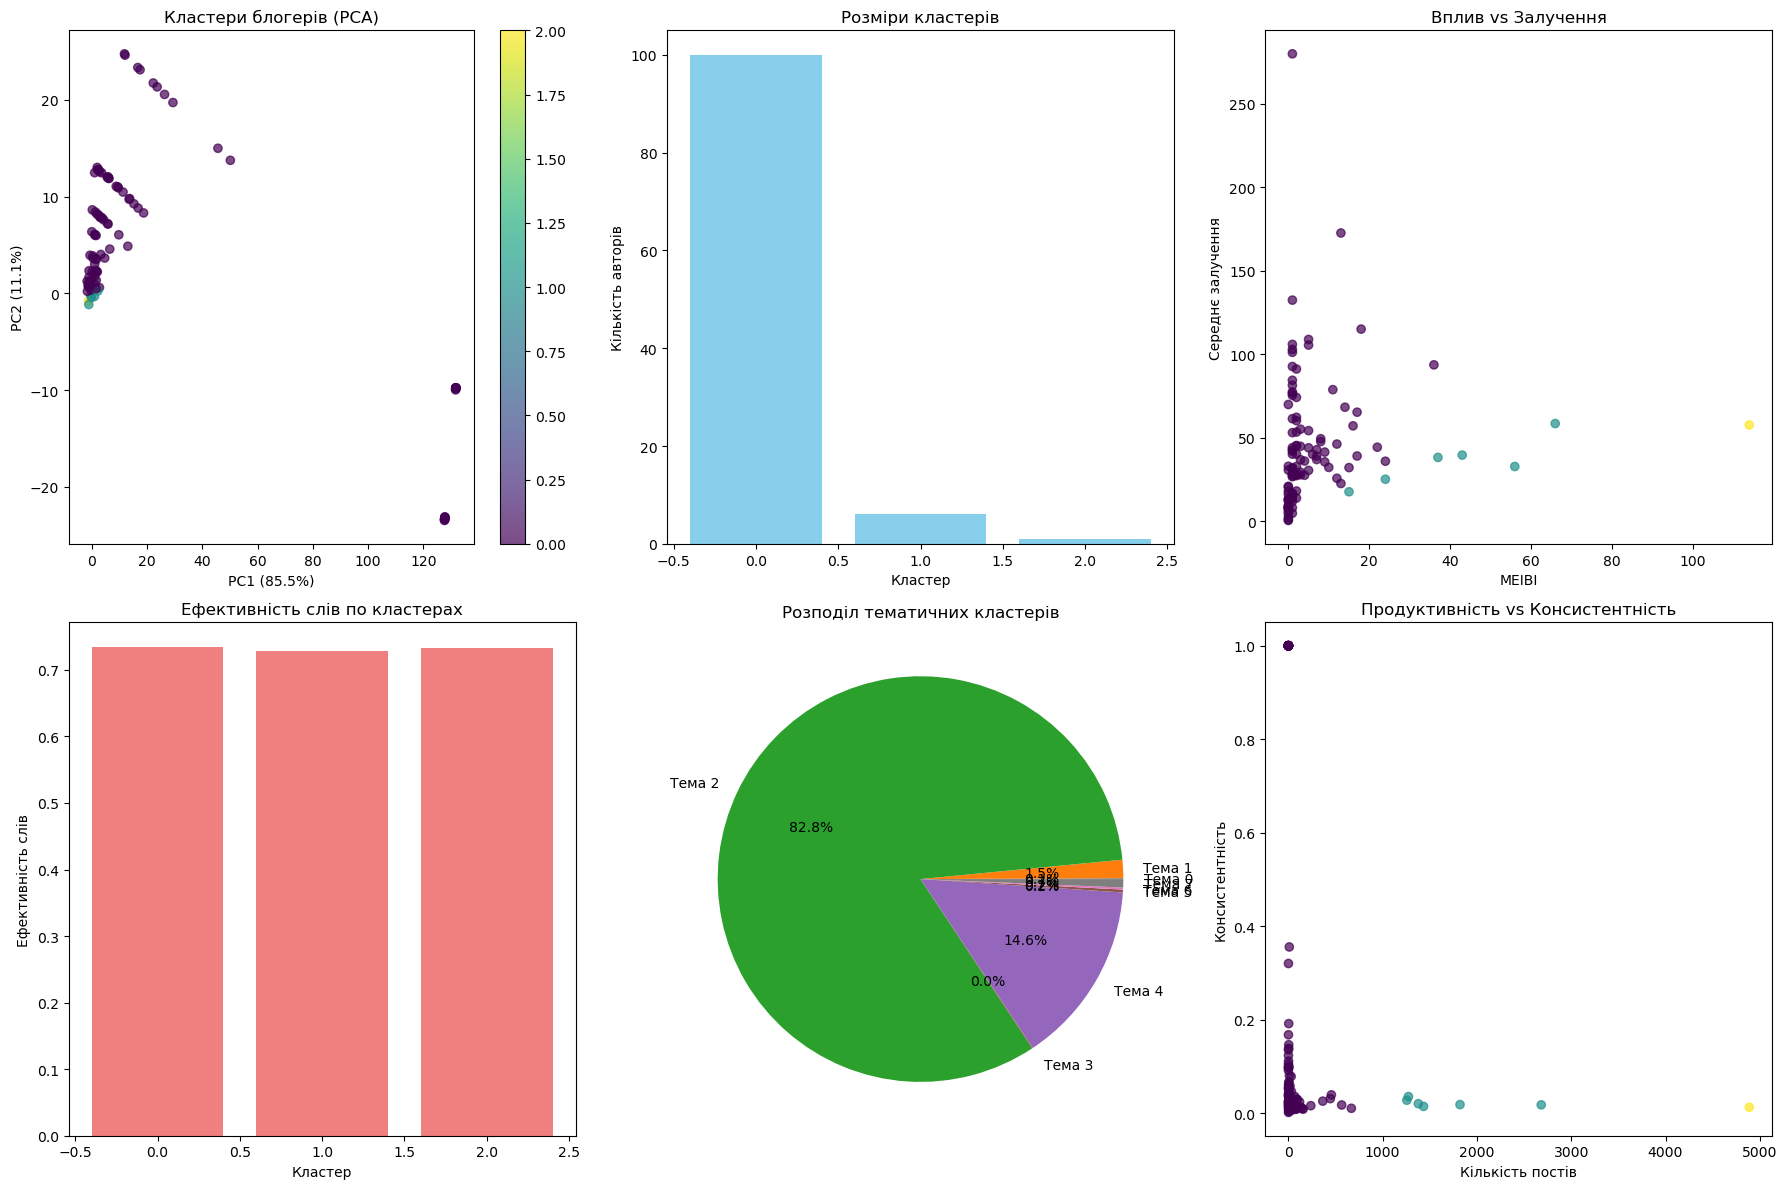

In [23]:
print("\n=== 6. Створення рекомендацій... ===")
recommendations = intelligent_recommendation_system(
    companies_df, final_df, cluster_analysis, topic_keywords
)
print("\n=== 7. Візуалізація результатів... ===")
create_visualizations(final_df, X_scaled, labels, cluster_analysis)

**Висновки з візуалізації:**  

1. Кластери блогерів (PCA) - верхній лівий  
Показує розташування блогерів у 2D просторі після зменшення розмірності.    
Кластери добре відокремлені, особливо жовта точка (Michael Arrington) стоїть окремо

2. Розміри кластерів - верхній центр  
Показує кількість авторів у кожному кластері.  
Кластер 0 домінує (~100 авторів), кластери 1-2 мають мало учасників  
Типова ситуація - багато середніх блогерів, мало топових

3. Вплив vs Залучення - верхній правий  
Жовта точка (топ-інфлюенсер) має найвищі показники

4. Ефективність слів по кластерах - нижній лівий  
Проблема: Всі стовпці однакової висоти (~0.75)    
*Можливо є помилка в розрахунках `word_efficiency` або дані потребують нормалізації* 

5. Розподіл тематичних кластерів - нижній центр  
Домінуюча тема: Тема 2 (Google, Video, Content) - 82.8%  
Інші теми: 4, 3, 1, 0 займають невеликі частки  
Блогери фокусуються на контент-платформах

6. Продуктивність vs Консистентність - нижній правий  
Більшість авторів мають низьку продуктивність    
Викид: Одна точка з дуже високою продуктивністю (5000+ постів)

**Загальні висновки:**
- Кластеризація працює добре
- Є чіткі типи блогерів
- Потрібно перевірити розрахунок ефективності слів
- Дані показують реалістичний розподіл інфлюенсерів

### Приклади рекомендацій

In [11]:
for i, (company, recs) in enumerate(list(recommendations.items())[:5]):
    print(f"\n{company}:")
    for j, rec in enumerate(recs):
        print(f"  {j+1}. {rec[0]} (MEIBI: {rec[1]:.0f}, Залучення: {rec[2]:.1f})")


blue point technologies:
  1. Michael Arrington (MEIBI: 114, Залучення: 57.7)
  2. Erick Schonfeld (MEIBI: 56, Залучення: 32.9)
  3. Jason Kincaid (MEIBI: 43, Залучення: 39.7)

call a cab limited:
  1. Michael Arrington (MEIBI: 114, Залучення: 57.7)
  2. MG Siegler (MEIBI: 66, Залучення: 58.6)
  3. Erick Schonfeld (MEIBI: 56, Залучення: 32.9)

nationwide car hire uk ltd:
  1. MG Siegler (MEIBI: 66, Залучення: 58.6)

european biomass association:
  1. Michael Arrington (MEIBI: 114, Залучення: 57.7)
  2. MG Siegler (MEIBI: 66, Залучення: 58.6)
  3. Erick Schonfeld (MEIBI: 56, Залучення: 32.9)

intermedicas worldwide:
  1. Michael Arrington (MEIBI: 114, Залучення: 57.7)
  2. MG Siegler (MEIBI: 66, Залучення: 58.6)
  3. Erick Schonfeld (MEIBI: 56, Залучення: 32.9)


In [ ]:
# df['word_efficiency'] = (
#         df['average_number_of_words_in_posts_(without_stopwords)'] / 
#         df['average_number_of_words_in_posts']

In [16]:
authors_posts_df['word_efficiency'].describe()

count    19378.000000
mean         0.730623
std          0.010505
min          0.682629
25%          0.726852
50%          0.731097
75%          0.732695
max          0.823856
Name: word_efficiency, dtype: float64

In [17]:
authors_posts_df['average_number_of_words_in_posts_(without_stopwords)'].describe()

count    19378.000000
mean         4.201708
std          0.181522
min          3.233319
25%          4.114451
50%          4.136101
75%          4.332748
max          5.105769
Name: average_number_of_words_in_posts_(without_stopwords), dtype: float64

In [18]:
authors_posts_df['average_number_of_words_in_posts'].describe()

count    19378.000000
mean         5.749658
std          0.201209
min          4.368871
25%          5.645050
50%          5.660201
75%          5.878248
max          6.637500
Name: average_number_of_words_in_posts, dtype: float64

In [19]:
4.201708/ 5.749658

0.7307752913303713